# Escape Summer School - Hyperparameters Optimization

In [22]:
import numpy as np
from numpy.random import randint
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

np.random.seed(0)
sns.set()

### Load datasets

Number of digits : 1797


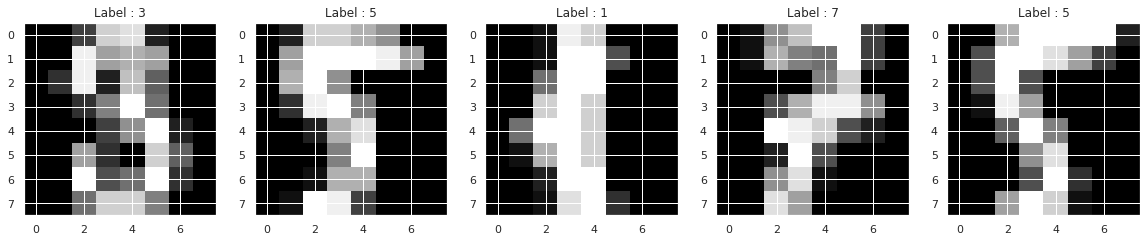

In [30]:
digits = load_digits()

images = digits['images']
labels = digits['target']
nb_images = len(images)
print('Number of digits :', nb_images)

rand_nbs = randint(0, nb_images, 5)

plt.figure(figsize=(20, 4))
for i,r in enumerate(rand_nbs):
    plt.subplot(1, 5, i + 1)
    plt.imshow(images[r], cmap="gray")
    plt.title('Label : ' + str(labels[r]))

## Classification

- The task for which the `digits` dataset was originally devised is, of course, identifying which handwritten digit is in each image.
- This is a useful task in the real world, where machines read postcodes on letters to sort them, and digits on cheques to validate them automatically.
- We have labels in the training dataset, therefore this is a **supervised classification** task. Supervised classification is the most common of modern ML tasks.

### Support Vector Classifiers

- Today, large-scale, high-dimensional classification tasks on complex data are almost always solved with deep neural networks.
- However, simpler algorithms are still used for smaller and lower-dimensional datasets. One of these is called the Support Vector Classifier.

Before we proceed, it's time to introduce the split between training set and test set.
- Having a separate test set, composed of data kept out of the training, is important in order to check whether our model is able to *generalise properly* on data it has not seen before.

### Split in train and test datasets

In [31]:
data_train, data_test, labels_train, labels_test = train_test_split(digits["data"], digits["target"], test_size=0.2, random_state=42)

print('Training set size :', labels_train.size)
print('Test set size     :', labels_test.size)

Training set size : 1437
Test set size     : 360


### Train classifier

In [32]:
svc = SVC(gamma=0.001)

# training
svc.fit(data_train, labels_train)

# looking at prediction on training set
predicted_train = svc.predict(data_train)

# looking at prediction on test set
predicted_test = svc.predict(data_test)

## Hyperparameters optimization

In [33]:
C = [0.01, 0.1, 1, 10, 100, 1000]
gamma = [0.1, 0.01, 0.001, 0.0001]

param_grid = [{'C': C, 'gamma': gamma, 'kernel': ['rbf']}]
gridsearch = GridSearchCV(cv = 5, estimator = svc, param_grid = param_grid)
gridsearch.fit(data_train, labels_train)

GridSearchCV(cv=5, estimator=SVC(gamma=0.001),
             param_grid=[{'C': [0.01, 0.1, 1, 10, 100, 1000],
                          'gamma': [0.1, 0.01, 0.001, 0.0001],
                          'kernel': ['rbf']}])

In [34]:
gridsearch.cv_results_

{'mean_fit_time': array([0.08048902, 0.07419033, 0.07281251, 0.07225118, 0.07932019,
        0.07433372, 0.04357371, 0.05983706, 0.08322597, 0.08352356,
        0.02622118, 0.02151728, 0.08845921, 0.08325405, 0.02632957,
        0.01357689, 0.08816519, 0.08288465, 0.02617378, 0.01329961,
        0.08999496, 0.08329949, 0.02633986, 0.01336131]),
 'std_fit_time': array([0.01390458, 0.00074166, 0.00065977, 0.00064418, 0.00065543,
        0.00261503, 0.00035346, 0.00043117, 0.00043446, 0.00023869,
        0.00020874, 0.0001893 , 0.00054853, 0.00020855, 0.00013462,
        0.00024549, 0.00057643, 0.00012031, 0.00023669, 0.00010518,
        0.00153073, 0.00011135, 0.00024934, 0.00015359]),
 'mean_score_time': array([0.01621599, 0.01679025, 0.01658597, 0.0165483 , 0.0161509 ,
        0.01649394, 0.01334281, 0.01637979, 0.01619501, 0.01612654,
        0.00879526, 0.01081595, 0.01635723, 0.01652961, 0.0091291 ,
        0.00649371, 0.01635213, 0.01618695, 0.00904102, 0.00599189,
        0.016508

In [35]:
mean_score = gridsearch.cv_results_ ["mean_test_score"].reshape (len(C),len(gamma))
print(mean_score)
std_score = gridsearch.cv_results_ ["std_test_score"].reshape (len(C),len(gamma))
print(std_score)
C_mat = gridsearch.cv_results_["param_C"].reshape(len(C),len(gamma))
gamma_mat  = gridsearch.cv_results_["param_gamma"].reshape(len(C),len(gamma))

[[0.10716705 0.10716705 0.10716705 0.10716705]
 [0.10716705 0.10716705 0.95547087 0.86289925]
 [0.10716705 0.74530343 0.9874758  0.96938153]
 [0.10716705 0.76130468 0.98956398 0.98190331]
 [0.10716705 0.76130468 0.98956398 0.9839939 ]
 [0.10716705 0.76130468 0.98956398 0.9839939 ]]
[[0.00132934 0.00132934 0.00132934 0.00132934]
 [0.00132934 0.00132934 0.0091432  0.02725483]
 [0.00132934 0.00772364 0.00417076 0.00968759]
 [0.00132934 0.01007682 0.00380809 0.00675866]
 [0.00132934 0.01007682 0.00380809 0.00355437]
 [0.00132934 0.01007682 0.00380809 0.00355437]]


Figure(720x360)


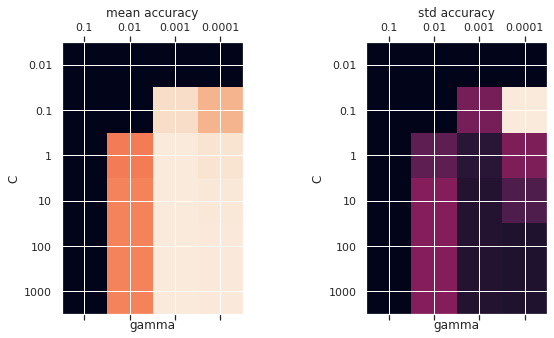

In [48]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.matshow(mean_score)
ax1.set_xticks(np.arange(len(gamma)))
ax1.set_xticklabels(gamma)
ax1.set_xlabel("gamma")
ax1.set_yticks(np.arange(len(C)))
ax1.set_yticklabels(C)
ax1.set_ylabel("C")
ax1.set_title("mean accuracy")

ax2.matshow(std_score)
ax2.set_xticks(np.arange(len(gamma)))
ax2.set_xticklabels(gamma)
ax2.set_xlabel("gamma")
ax2.set_yticks(np.arange(len(C)))
ax2.set_yticklabels(C)
ax2.set_ylabel("C")
ax2.set_title("std accuracy")
print(fig)